<a href="https://colab.research.google.com/github/Gus-1003/Processamento-Digital-de-Imagem/blob/main/Pratica_1_Degrade%20e%20Lena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pratica 1: Introdução a PDI

## Principais Bibliotecas para PDI no Python:

* ***OpenCV:*** É uma das bibliotecas mais utilizadas em visão computacional e processamento de imagem em Python. Possui funções de processamento de imagem, rastreamento de objetos, detecção de faces, entre outras.

* ***Pillow:*** É uma biblioteca Python de processamento de imagens que suporta uma ampla gama de formatos de imagem. Ela é fácil de usar e possui muitas funções de manipulação de imagem, como rotação, corte e redimensionamento.

* ***Scikit-image:*** É uma biblioteca Python de processamento de imagem que fornece ferramentas para análise de imagens, transformações geométricas, filtragem, segmentação, detecção de bordas e muito mais.

* ***NumPy:*** Embora não seja exclusivamente uma biblioteca de processamento de imagem, é frequentemente utilizada em conjunto com outras bibliotecas para processamento de imagem em Python. NumPy é uma biblioteca fundamental para computação científica com Python e fornece muitas funções úteis para processamento de imagem, como operações matemáticas em matrizes e transformações de Fourier.

In [1]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import cv2

from PIL import Image

import skimage

import numpy as np

import matplotlib.pyplot as plt

## Criando uma imagem vazia:

A definição de imagem pode variar dependendo do contexto em que está sendo utilizada, mas em geral, uma imagem pode ser definida como uma representação visual bidimensional de um objeto ou cena capturada por um dispositivo de imagem, como uma câmera ou um scanner.

Uma imagem é composta por pixels (ou elementos de imagem), que são pontos individuais que contêm informações de cor e intensidade. Cada pixel é colocado em uma grade ou matriz de pixels, onde a posição de cada pixel é determinada pelas coordenadas de linha e coluna.

A resolução da imagem se refere à quantidade de pixels contidos na imagem, e é medida em termos de largura e altura da imagem em pixels. A qualidade da imagem depende da quantidade de detalhes que podem ser visualizados pelos pixels, e é influenciada por fatores como resolução, profundidade de bits, contraste, brilho e nitidez.

As imagens podem ser armazenadas em vários formatos, como JPEG, PNG, TIFF e BMP, e podem ser processadas digitalmente usando algoritmos de processamento de imagem para realizar tarefas como correção de cor, detecção de bordas, segmentação de objetos e muito mais.

Em resumo, uma imagem é uma representação visual de um objeto ou cena em uma grade bidimensional de pixels, onde cada pixel contém informações de cor e intensidade e pode ser processado digitalmente para realizar tarefas específicas.

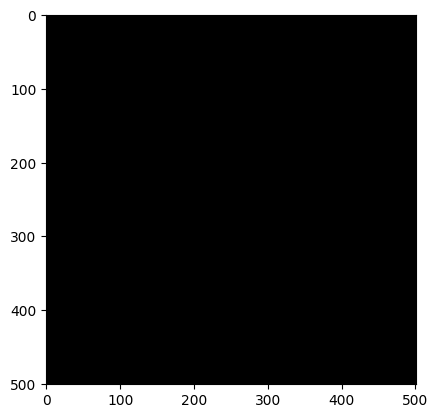

In [16]:
# criar uma matriz (o que represatira um aglomerado de pixels) vazia (Pixels com intensidade = 0) com 512 linhas e 512 colunas
imagem_vazia = np.zeros((501, 501))

# exibir a imagem usando o matplotlib
plt.imshow(imagem_vazia, cmap='gray')
plt.show()

## Descobrindo as Dimensões da Imagem:

In [17]:
'''usando o método shape da matriz imagem_vazia para obter uma tupla com as dimensões da matriz. Em seguida, estamos atribuindo 
os valores da tupla às variáveis linhas e colunas para que possamos exibi-las na saída do console usando a função print().'''

# obter as dimensões da matriz
linhas, colunas = imagem_vazia.shape

print("Número de linhas:", linhas)
print("Número de colunas:", colunas)

Número de linhas: 501
Número de colunas: 501


## Formas de fazer um degrade:

### Forma 1: Uso de laços

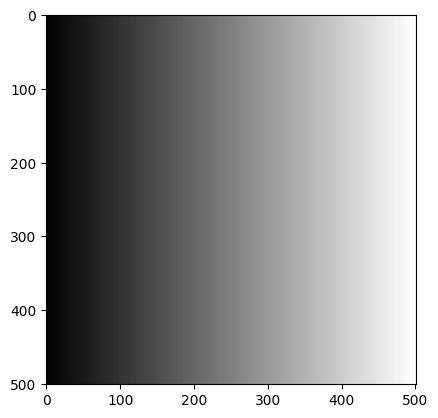

In [18]:
# percorrer cada linha da imagem
for linha in range(linhas):
    # percorrer cada coluna da imagem
    for coluna in range(colunas):
        # definir o valor do pixel com base na posição da coluna na imagem
        imagem_vazia[linha][coluna] = coluna / 511.0

# exibir a imagem do degradê usando o matplotlib
plt.imshow(imagem_vazia, cmap='gray')
plt.show()    

Neste exemplo, estamos usando dois loops for para percorrer cada linha e coluna da matriz da imagem. Para cada pixel da imagem, definimos o valor do pixel como a posição da coluna normalizada para um valor entre 0 e 1.

O resultado é uma matriz que contém valores de pixel que variam de preto (valor 0) no início da linha até branco (valor 1) no final da linha, criando um degradê horizontal.

Finalmente, usamos a função imshow() do Matplotlib para exibir a imagem do degradê. A opção cmap='gray' é usada para definir a escala de cores da imagem como escala de cinza.

Você pode alterar a forma como o valor do pixel é calculado no loop for interno para criar diferentes tipos de degradês horizontais.

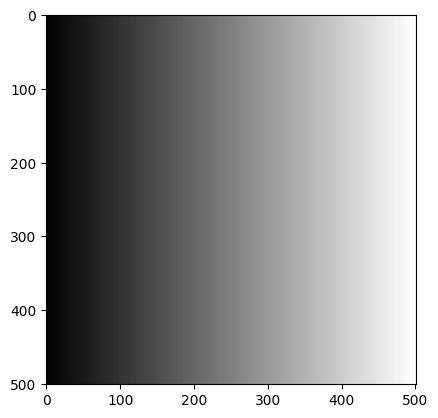

In [24]:
# definir o número de tons desejados
num_tons = 256

# percorrer cada linha da imagem
for linha in range(501):
    # percorrer cada coluna da imagem
    for coluna in range(501):
        # definir o valor máximo que um pixel pode ter
        max_valor_pixel = num_tons - 1
        # definir o valor do pixel com base na posição da coluna na imagem
        imagem_vazia[linha][coluna] = coluna * max_valor_pixel / 500.0

# exibir a imagem do degradê usando o matplotlib
plt.imshow(imagem_vazia, cmap='gray')
plt.show()

Neste exemplo, estamos definindo a variável num_tons com o número de tons desejados. Em seguida, estamos criando uma matriz numpy vazia com o mesmo tamanho da imagem anterior.

Ao percorrer cada pixel da imagem, estamos definindo o valor máximo que um pixel pode ter com base no número de tons desejados. Em seguida, estamos definindo o valor de cada pixel com base na posição da coluna na imagem, dividindo esse valor pelo valor máximo permitido, de modo que os valores de pixel variem de 0 a 1.

Finalmente, usamos a função imshow() do Matplotlib para exibir a imagem do degradê em escala de cinza. Note que, agora, estamos criando 256 tons de cinza, o que significa que a imagem terá pixels com valores inteiros de 0 a 255.

### Forma 2: Aplicação de funções do Numpy

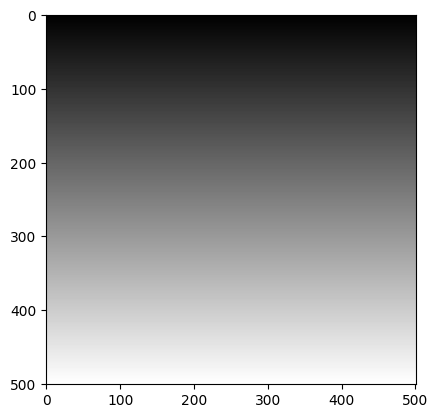

In [20]:
# criar uma matriz numpy com uma escala de cinza linear (0 = preto, 1 = branco)
escala_cinza = np.linspace(0, 1, 501)

'''A função np.outer() é usada para criar uma matriz bidimensional onde cada linha representa a 
escala de cinza e a largura da imagem é preenchida com o valor 1.'''
# mesclar a matriz da escala de cinza com a matriz vazia da imagem para criar o degradê
imagem_degrade = np.outer(escala_cinza, np.ones(501))

# a função imshow() do Matplotlib é usada para exibir a imagem. 
# O parametro cmap='gray' é usada para definir a escala de cores da imagem como escala de cinza.
plt.imshow(imagem_degrade, cmap='gray')
plt.show()

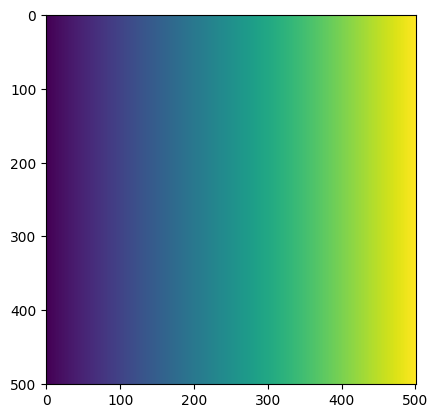

In [21]:
escala_verde = np.linspace(0, 1, 501)
imagem_degrade = np.outer(np.ones(501), escala_verde)
plt.imshow(imagem_degrade)

você pode usar a biblioteca NumPy para criar uma matriz de valores que representam uma escala de cores. A matriz de valores de cor será então mesclada com a matriz vazia da imagem, criando um degradê.

Imagem: Lena